<span style="color:#87cefa; font-size:200%">Plots for Summery 2/4 2022</span> 

In [256]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter
from gridfill import fill

import matplotlib.patches as patches

#print("1")
import Mesh_data
#print("2")
import Mesh_data_server
import seaborn
#print("3")
import fort44_reader_server as fort
#print("4")
import Mesh_data_integrated
import b2fplasmf

al_new_g_sep_out_target_dist = Mesh_data_integrated.grid_data("./b2fgmtry_ng")[1] 
al_new_g_sep_in_target_dist = Mesh_data_integrated.grid_data("./b2fgmtry_ng")[0] 

# I know it looks suspicious, but that co~~ is dedicate to new g
al_newg_newmesh_facing = np.load("./gs_new_g_SAS.npy")


#reload(Mesh_data_integrated)
reload(fort)

eV = 1.60218e-19
import cmasher as cmr


In [257]:
co_new_g_sep_out_target_dist = Mesh_data_integrated.grid_data("./../runs/Con_22849_Ne0_Heating/baserun/b2fgmtry")[1] 
co_new_g_sep_in_target_dist = Mesh_data_integrated.grid_data("./../runs/Con_22849_Ne0_Heating/baserun/b2fgmtry")[0] 
co_new_g_facing = Mesh_data_integrated.facing_data("./../runs/Con_22849_Ne0_Heating/baserun/b2fgmtry")


In [258]:
ny = 36
nx = 96
co_mesh = np.load("./conv_geo_mesh_center.npy")
co_mesh_x = np.load("./conv_geo_mesh_x.npy")
co_mesh_y = np.load("./conv_geo_mesh_y.npy")

al_mesh = np.load("./al_geo_mesh_center.npy")
al_mesh_x = np.load("./al_geo_mesh_x.npy")
al_mesh_y = np.load("./al_geo_mesh_y.npy")

co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")


co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")


newSAS_mesh = np.load("./new_SAS_geo_mesh_center.npy")
newSAS_mesh_x = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_mesh_y = np.load("./new_SAS_geo_mesh_y.npy")
#newSAS_facing = np.load("./gs_new_SAS.npy")
new_SAS_facing = np.load("./gs_new_SAS.npy")

al_new_g_mesh = np.load("ng_geo_mesh_center.npy")
al_new_g_mesh_x = np.load("ng_geo_mesh_x.npy")
al_new_g_mesh_y = np.load("ng_geo_mesh_y.npy")

al_new_g_facing = np.load("./gs_new_g_SAS.npy")

al_v1_facing = np.load("./gs_SAS_v1.npy")



print(np.shape(co_facing))
print(np.shape(al_facing))
def co_distance_center(first_point, second_point):
    x_range = x_co_meshinfo[first_point[1],first_point[0]]-x_co_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_meshinfo[first_point[1],first_point[0]]-y_co_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def co_distance_point(first_point, second_point):
    x_range = co_mesh_x[first_point[2],first_point[1],first_point[0]]-co_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_mesh_y[first_point[2],first_point[1],first_point[0]]-co_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_al_meshinfo[first_point[1],first_point[0]]-x_al_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_meshinfo[first_point[1],first_point[0]]-y_al_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = al_mesh_x[first_point[2],first_point[1],first_point[0]]-al_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_mesh_y[first_point[2],first_point[1],first_point[0]]-al_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

#new geo files
def co_new_mesh_distance_center(first_point, second_point):
    x_range = x_co_new_meshinfo[first_point[1],first_point[0]]-x_co_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_new_meshinfo[first_point[1],first_point[0]]-y_co_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result
def co_new_mesh_distance_point(first_point, second_point):
    x_range = co_new_mesh_x[first_point[2],first_point[1],first_point[0]]-co_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_new_mesh_y[first_point[2],first_point[1],first_point[0]]-co_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def al_new_mesh_distance_center(first_point, second_point):
    x_range = x_al_new_meshinfo[first_point[1],first_point[0]]-x_al_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_new_meshinfo[first_point[1],first_point[0]]-y_al_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_new_mesh_distance_point(first_point, second_point):
    x_range = al_new_mesh_x[first_point[2],first_point[1],first_point[0]]-al_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_new_mesh_y[first_point[2],first_point[1],first_point[0]]-al_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def newSAS_distance_center(first_point, second_point):
    x_range = x_newSAS_meshinfo[first_point[1],first_point[0]]-x_newSAS_meshinfo[second_point[1],second_point[0]]
    y_range = y_newSAS_meshinfo[first_point[1],first_point[0]]-y_newSAS_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def newSAS_distance_point(first_point, second_point):
    x_range = newSAS_mesh_x[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = newSAS_mesh_y[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result




def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
    
dumx_co_meshinfo = co_mesh[:,0]
dumy_co_meshinfo = co_mesh[:,1]
x_co_meshinfo = dumx_co_meshinfo.reshape(ny+2,nx+2)
y_co_meshinfo = dumy_co_meshinfo.reshape(ny+2,nx+2)

dumx_al_meshinfo = al_mesh[:,0]
dumy_al_meshinfo = al_mesh[:,1]
x_al_meshinfo = dumx_al_meshinfo.reshape(ny+2,nx+2)
y_al_meshinfo = dumy_al_meshinfo.reshape(ny+2,nx+2)

dumx_co_new_meshinfo = co_new_mesh[:,0]
dumy_co_new_meshinfo = co_new_mesh[:,1]
x_co_new_meshinfo = dumx_co_new_meshinfo.reshape(ny+2,nx+2)
y_co_new_meshinfo = dumy_co_new_meshinfo.reshape(ny+2,nx+2)

dumx_al_new_meshinfo = al_new_mesh[:,0]
dumy_al_new_meshinfo = al_new_mesh[:,1]
x_al_new_meshinfo = dumx_al_new_meshinfo.reshape(ny+2,nx+2)
y_al_new_meshinfo = dumy_al_new_meshinfo.reshape(ny+2,nx+2)

dumx_newSAS_meshinfo = newSAS_mesh[:,0]
dumy_newSAS_meshinfo = newSAS_mesh[:,1]
x_newSAS_meshinfo = dumx_newSAS_meshinfo.reshape(ny+2,nx+2)
y_newSAS_meshinfo = dumy_newSAS_meshinfo.reshape(ny+2,nx+2)


#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)
co_sep_out_target = np.zeros(2)
co_sep_out_target[0] = co_mesh_x[1,18,96]
co_sep_out_target[1] = co_mesh_y[1,18,96]
co_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = al_mesh_x[1,18,96]
al_sep_out_target[1] = al_mesh_y[1,18,96]
al_mesh_x_cen = np.sum(al_mesh_x, axis = 0)/4
al_mesh_y_cen = np.sum(al_mesh_y, axis = 0)/4

co_new_mesh_sep_out_target = np.zeros(2)
co_new_mesh_sep_out_target[0] = co_mesh_x[1,18,96]
co_new_mesh_sep_out_target[1] = co_mesh_y[1,18,96]
co_new_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_new_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_new_mesh_sep_out_target = np.zeros(2)
al_new_mesh_sep_out_target[0] = al_new_mesh_x[1,18,96]
al_new_mesh_sep_out_target[1] = al_new_mesh_y[1,18,96]
al_new_mesh_x_cen = np.sum(al_new_mesh_x, axis = 0)/4
al_new_mesh_y_cen = np.sum(al_new_mesh_y, axis = 0)/4

newSAS_sep_out_target = np.zeros(2)
newSAS_sep_out_target[0] = newSAS_mesh_x[1,18,96]
newSAS_sep_out_target[1] = newSAS_mesh_y[1,18,96]
newSAS_mesh_x_cen = np.sum(newSAS_mesh_x, axis = 0)/4
newSAS_mesh_y_cen = np.sum(newSAS_mesh_y, axis = 0)/4



X_point = []



co_sep_out_target_dist = np.zeros(ny+2)
co_sep_in_target_dist = np.zeros(ny+2)     
co_sep_out_midplane_dist = np.zeros(ny+2)
co_sep_in_midplane_dist = np.zeros(ny+2)

co_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_out_target_dist = np.zeros(ny+2)
co_new_mesh_sep_in_target_dist = np.zeros(ny+2)

al_sep_out_midplane_dist = np.zeros(ny+2)
al_sep_in_midplane_dist = np.zeros(ny+2)
al_sep_out_target_dist = np.zeros(ny+2)
al_sep_in_target_dist = np.zeros(ny+2)


al_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_out_target_dist = np.zeros(ny+2)
al_new_mesh_sep_in_target_dist = np.zeros(ny+2)

newSAS_sep_out_midplane_dist = np.zeros(ny+2)
newSAS_sep_in_midplane_dist = np.zeros(ny+2)
newSAS_sep_out_target_dist = np.zeros(ny+2)
newSAS_sep_in_target_dist = np.zeros(ny+2)



conv_Xpt_dist = np.zeros(20)
al_Xpt_dist = np.zeros(20)






for i in range(ny+2):
    co_sep_out_midplane_dist[i] = co_distance_point([52,i,1],[52,18,1])
    co_sep_in_midplane_dist[i]  = co_distance_point([29,i,1],[29,18,1])
    co_sep_out_target_dist[i] = co_distance_point([96,i,1],[96,18,1])
    co_sep_in_target_dist[i] = co_distance_point([1,i,1],[1,18,1])


    co_new_mesh_sep_out_midplane_dist[i] = co_new_mesh_distance_point([52,i,1],[52,18,1])
    co_new_mesh_sep_in_midplane_dist[i]  = co_new_mesh_distance_point([29,i,1],[29,18,1])
    co_new_mesh_sep_out_target_dist[i] = co_new_mesh_distance_point([96,i,1],[96,18,1])
    co_new_mesh_sep_in_target_dist[i]  = co_new_mesh_distance_point([1,i,1],[1,18,1])

    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    al_sep_in_midplane_dist[i]  = al_distance_point([29,i,1],[29,18,1])
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    al_sep_in_target_dist[i]  = al_distance_point([1,i,1],[1,18,1])


    al_new_mesh_sep_out_midplane_dist[i] = al_new_mesh_distance_point([52,i,1],[52,18,1])
    al_new_mesh_sep_in_midplane_dist[i]  = al_new_mesh_distance_point([29,i,1],[29,18,1])
    al_new_mesh_sep_out_target_dist[i] = al_new_mesh_distance_point([96,i,1],[96,18,1])
    al_new_mesh_sep_in_target_dist[i]  = al_new_mesh_distance_point([1,i,1],[1,18,1])
    

#    newSAS_sep_out_midplane_dist[i] = newSAS_distance_point([52,i,1],[52,18,1])
#    newSAS_sep_in_midplane_dist[i]  = newSAS_distance_point([29,i,1],[29,18,1])
#    newSAS_sep_out_target_dist[i] = newSAS_distance_point([96,i,1],[96,18,1])
#    newSAS_sep_in_target_dist[i]  = newSAS_distance_point([1,i,1],[1,18,1])
    
    if i<18:
        co_sep_out_midplane_dist[i] = -co_sep_out_midplane_dist[i]
        co_sep_in_midplane_dist[i]  = -co_sep_in_midplane_dist[i]
        co_sep_out_target_dist[i] = -co_sep_out_target_dist[i]
        co_sep_in_target_dist[i] = -co_sep_in_target_dist[i]

        co_new_mesh_sep_out_midplane_dist[i] = -co_new_mesh_sep_out_midplane_dist[i]
        co_new_mesh_sep_in_midplane_dist[i]  = -co_new_mesh_sep_in_midplane_dist[i]
        co_new_mesh_sep_out_target_dist[i] = -co_new_mesh_sep_out_target_dist[i]
        co_new_mesh_sep_in_target_dist[i] = -co_new_mesh_sep_in_target_dist[i]

        
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]
        
        al_new_mesh_sep_out_midplane_dist[i] = -al_new_mesh_sep_out_midplane_dist[i]
        al_new_mesh_sep_in_midplane_dist[i] = -al_new_mesh_sep_in_midplane_dist[i]
        al_new_mesh_sep_out_target_dist[i] = -al_new_mesh_sep_out_target_dist[i]
        al_new_mesh_sep_in_target_dist[i] = -al_new_mesh_sep_in_target_dist[i]

        
newSAS_sep_out_midplane_dist = Mesh_data.newSAS_sep_out_midplane_dist
newSAS_sep_in_midplane_dist = Mesh_data.newSAS_sep_in_midplane_dist
newSAS_sep_out_target_dist = Mesh_data.newSAS_sep_out_target_dist
newSAS_sep_in_target_dist = Mesh_data.newSAS_sep_in_target_dist
        

v1SAS_sep_out_midplane_dist = Mesh_data.v1SAS_sep_out_target_dist
v1SAS_sep_in_midplane_dist = Mesh_data.v1SAS_sep_in_midplane_dist
v1SAS_sep_out_target_dist = Mesh_data.v1SAS_sep_out_target_dist
v1SAS_sep_in_target_dist = Mesh_data.v1SAS_sep_in_target_dist


    
for i in range(20):
    conv_Xpt_dist[i] = co_distance_center([78,18],[78+i,18])

    
    
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)


# def total_pressure(ne,te,na,ti):
#     pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
#     return pr


def total_neutral_pressure(ne,te,na,ti,ua):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)+ne[:,:]*te[:,:] + na[1,:,:]*ua[1,:,:]*ua[1,:,:] +np.sum(na[2:9,:,:]*ua[2:9,:,:]*ua[2:9,:,:],axis = 0)+np.sum(na[9:,:,:]*ua[9:,:,:]*ua[9:,:,:],axis = 0)
    return pr


def total_pressure(ne,te,na,ti,ua):

    mass_indes = np.array([3.3435837724*10**(-27),3.3435837724*10**(-27),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26)])
#    mass_indes = np.transpose(mass_indes)
    pr = ne[:,:]*te[:,:] 
    impor = na[:,:,:]*ua[:,:,:]*ua[:,:,:]
    for i in range(np.shape(mass_indes)[0]):
        pr= pr+impor[i,:,:]*mass_indes[i]+na[i,:,:]*ti[:,:]
    return pr



(3, 38, 98)
(3, 38, 98)
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


In [259]:
Ar_31642_14500ms_x = Mesh_data_integrated.mesh_data("./../runs/Ar_3e19_31642_014500/baserun/b2fgmtry")[0]

Ar_31642_14500ms_y = Mesh_data_integrated.mesh_data("./../runs/Ar_3e19_31642_014500/baserun/b2fgmtry")[1]


In [260]:
prob_x = Mesh_data_integrated.mesh_data("./../runs/Con_Ne_0_Heating/baserun/b2fgmtry")[0]

prob_y = Mesh_data_integrated.mesh_data("./../runs/Con_Ne_0_Heating/baserun/b2fgmtry")[1]

In [261]:
prob_x1 = Mesh_data_integrated.mesh_data("./../runs/SAS_Ne_3e19/baserun/b2fgmtry")[0]

prob_y1 = Mesh_data_integrated.mesh_data("./../runs/SAS_Ne_3e19/baserun/b2fgmtry")[1]

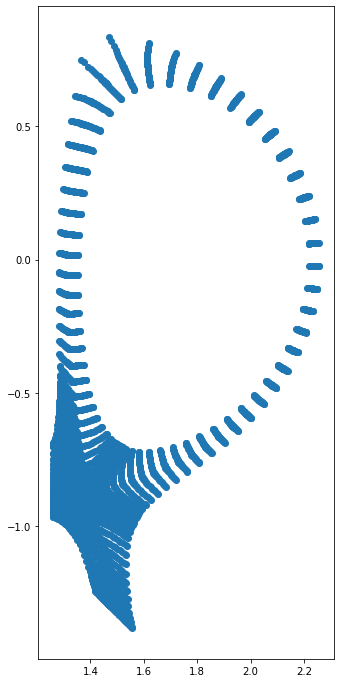

In [262]:
fig=plt.figure(figsize=(12, 12))

plt.axes().set_aspect('equal')
plt.scatter(prob_x,prob_y)
plt.show()

In [263]:
rqrad_3MW = b2fplasmf.data("./../runs/Ar_3e19_31642_014500/3MW_Ar_31642_14500/b2fplasmf","rqrad", 28)
rqrad_4MW = b2fplasmf.data("./../runs/Ar_3e19_31642_014500/4MW_31642_14500/b2fplasmf","rqrad", 28)

eir_3MW = fort.eir_spec("./../runs/Ar_3e19_31642_014500/3MW_Ar_31642_14500")
eir_4MW = fort.eir_spec("./../runs/Ar_3e19_31642_014500/4MW_31642_14500")

In [264]:
te_3MW = b2fplasmf.data("./../runs/Ar_3e19_31642_014500/3MW_Ar_31642_14500/b2fplasmf","te", 28)/eV
te_4MW = b2fplasmf.data("./../runs/Ar_3e19_31642_014500/4MW_31642_14500/b2fplasmf","te", 28)/eV

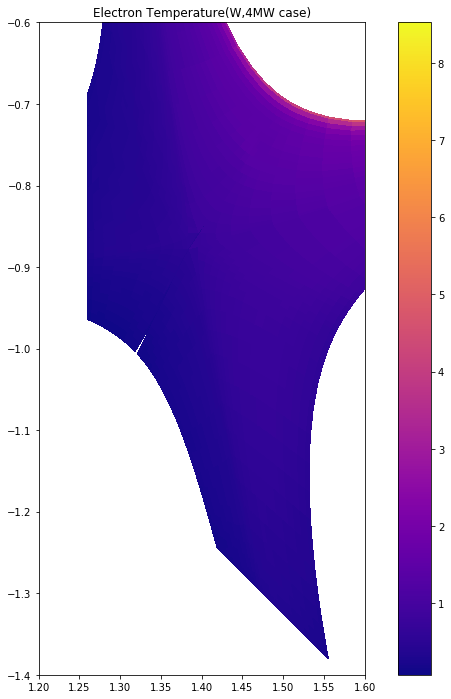

8.522397497924702


In [265]:
cmap = cmr.cosmic

fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.6)
plt.title("Electron Temperature(W,4MW case)")
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.6)
z=te_4MW
plt.pcolormesh(prob_x, prob_y,z,shading='flat', cmap="plasma")
plt.colorbar()

plt.show()
print(np.max(z))

In [266]:
print(np.shape(prob_x))

(38, 98)


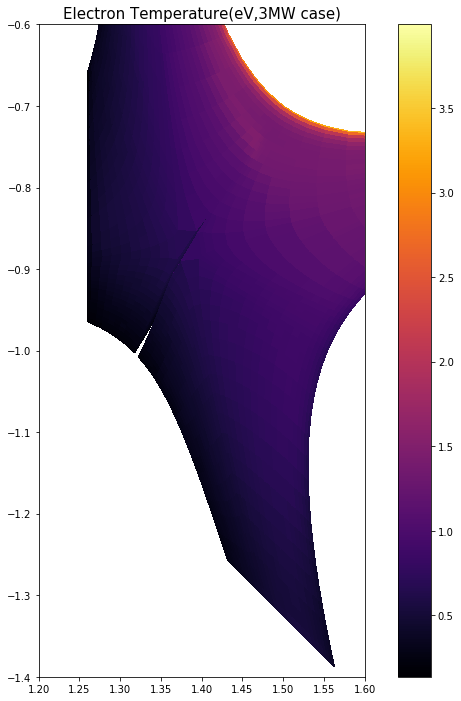

3.994240951753361


In [267]:
reload(b2fplasmf)

cmap = cmr.cosmic

fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.title("Electron Temperature(eV,3MW case)", fontsize=15)
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.6)
z=te_3MW
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z,cmap="inferno")

plt.colorbar()

plt.show()
print(np.max(z))



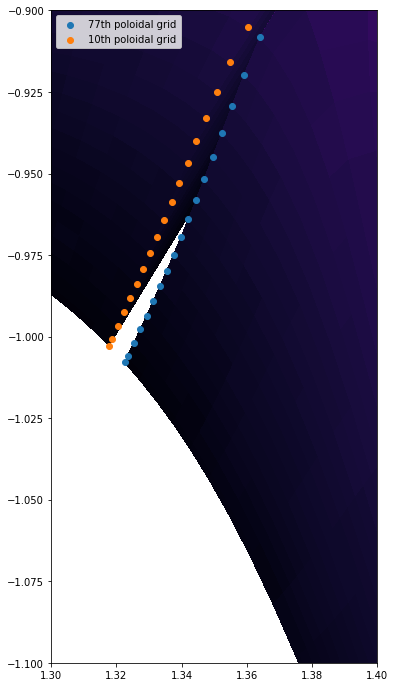

In [268]:


fig=plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('xkcd:white')



plt.axes().set_aspect('equal')

plt.xlim(1.3,1.4)
plt.ylim(-1.1,-0.9)
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z,cmap="inferno")
ax.grid(True, color="crimson", lw=2)
a=77
plt.scatter(Ar_31642_14500ms_x[:,a],Ar_31642_14500ms_y[:,a],label = "%ith poloidal grid" %a)
b=10
plt.scatter(Ar_31642_14500ms_x[:,b],Ar_31642_14500ms_y[:,b],label = "%ith poloidal grid" %b)
plt.legend()
plt.show()

In [272]:
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z,cmap="inferno")


TypeError: grids must be a masked array

In [ ]:

fig=plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.xlim(1.3,1.4)
plt.ylim(-1.1,-0.9)
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z,cmap="inferno")
ax.grid(True, color="crimson", lw=2)
a=77
plt.scatter(Ar_31642_14500ms_x[:11,a],Ar_31642_14500ms_y1[:11,a],label = "%ith poloidal grid" %a)
b=10
plt.scatter(Ar_31642_14500ms_x[:11,b],Ar_31642_14500ms_y1[:11,b],label = "%ith poloidal grid" %b)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pyproj

x= np.arange(-1, 1.1, 0.4)
y= np.arange(-1, 1.1, 0.3)

X, Y = np.meshgrid(x, y)

pt = mproj.polar.PolarTransform()

R = X*0
T = X*0

for i in range(len(x)):
    for j in range(len(y)):
        R[j, i], T[j, i] = pt.inverted().transform((X[j, i], Y[j, i]))

ax = plt.subplot(121, projection='polar')
ax.plot(R, T, 'd')
ax.pcolormesh(R, T, R, shading='flat')

ax = plt.subplot(122, projection='polar')
ax.plot(R, T, 'd')
ax.pcolormesh(R, T, R, shading='nearest')

In [ ]:
reload(b2fplasmf)

fht_4MW = b2fplasmf.data("./../runs/Ar_3e19_31642_014500/4MW_31642_14500/b2fplasmf","fht", 28)

cmap = cmr.cosmic

fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.title("fht(eV,4MW case)", fontsize=15)
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.6)
z=fht_4MW[1,:,:]
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z,cmap="inferno")

plt.colorbar()

plt.show()
print(np.max(z))

In [ ]:

cmap = cmr.cosmic
fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.title("Radiation(W,3MW case)", fontsize=15)
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.6)
z=np.sum(fht_4MW,axis=0)
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z, norm=colors.SymLogNorm(linthresh=0.001, linscale=0.03,vmin=0, vmax=np.max(z)),cmap=cmap)
plt.colorbar()

#plt.contour(Ar_31642_14500ms_x, Ar_31642_14500ms_y, z, 1, colors='k')


plt.show()

In [ ]:
out_fht_Con_3times = b2fplasmf.data("/home/chanyeong/solps-iter/runs/Con_3times/100MW_3Con/b2fplasmf" ,"fht",20)
np.shape(out_fht_Con_3times)

In [ ]:


cmap = cmr.cosmic
fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.title("Radiation(W,3MW case)", fontsize=15)
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.6)
z=np.sum(rqrad_3MW,axis=0)+np.sum(eir_3MW[0],axis=0)
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z, norm=colors.SymLogNorm(linthresh=0.001, linscale=0.03,vmin=0, vmax=np.max(z)),cmap=cmap)
plt.colorbar()

#plt.contour(Ar_31642_14500ms_x, Ar_31642_14500ms_y, z, 1, colors='k')


plt.show()

In [ ]:

fig=plt.figure(figsize=(12, 12))

fig.patch.set_facecolor('xkcd:white')

plt.axes().set_aspect('equal')

plt.title("Radiation(W,4MW case)")
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.6)
z=np.sum(rqrad_4MW,axis=0)+np.sum(eir_4MW[0],axis=0)
plt.pcolormesh(Ar_31642_14500ms_x, Ar_31642_14500ms_y,z, norm=colors.SymLogNorm(linthresh=0.001, linscale=1,vmin=0, vmax=np.max(z)),cmap='plasma')

plt.colorbar()

plt.show()